# Task no: 1
# Movie Rating Prediction With Python
### 1. Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.
### 2. The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.
### 3. Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.

In [89]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

* Loading DataSet and Preview.

In [156]:
path = os.path.abspath("IMDb_Movies_India.csv")
data = pd.read_csv(path, encoding="ISO-8859-1")
df = pd.DataFrame(data)
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


* Findout the dimension and shape of Dataset

In [91]:
print("Shape of Dataset: ",df.shape)
print("No. of rows: ",df.shape[0])
print("No. of columns: ",df.shape[1])

Shape of Dataset:  (15509, 10)
No. of rows:  15509
No. of columns:  10


### Make a function to calculate the null values in dataset

In [162]:
def Calculate_null_values(df):
    null_dataset = {"Column":[],"Null_Values":[]}
    for i in df.columns:
        null_dataset['Column'].append(i)
        null_dataset['Null_Values'].append(df[i].isnull().sum())
    null_dataset = pd.DataFrame(null_dataset)
    null_dataset["Total_Values"] = df.shape[0]
    null_dataset['Null_values_percentage_per_column'] = round((null_dataset['Null_Values']/df.shape[0])*100,2)
    return null_dataset

### Checking how much null values our dataset contain

In [163]:
null_dataset = {"Column":[],"Null_Values":[]}
for i in df.columns:
    null_dataset['Column'].append(i)
    null_dataset['Null_Values'].append(df[i].isnull().sum())

In [164]:
null_dataset = pd.DataFrame(null_dataset)
null_dataset

,Column,Null_Values
0,Name,0
1,Year,528
2,Duration,8269
3,Genre,1877
4,Rating,7590
5,Votes,7589
6,Director,525
7,Actor 1,1617
8,Actor 2,2384
9,Actor 3,3144


In [165]:
null_dataset["Total_Values"] = df.shape[0]

<Axes: title={'center': 'Stacked Bar Graph shows null values in dataset'}, xlabel='Column'>

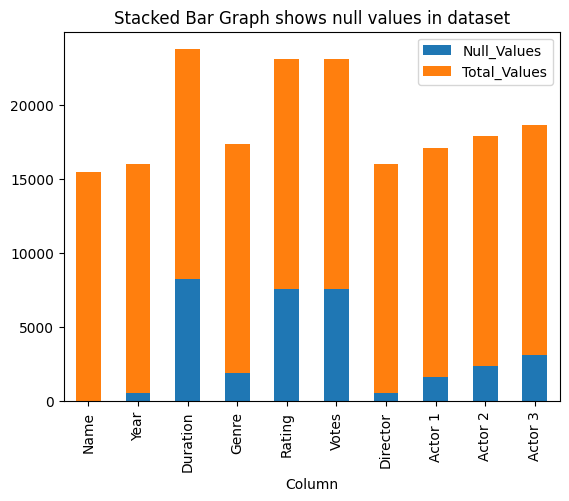

In [166]:
null_dataset.plot(x='Column', kind='bar', stacked=True, title='Stacked Bar Graph shows null values in dataset')

In [167]:
null_dataset['Null_values_percentage_per_column'] = round((null_dataset['Null_Values']/df.shape[0])*100,2)
null_dataset

,Column,Null_Values,Total_Values,Null_values_percentage_per_column
0,Name,0,15509,0.00
1,Year,528,15509,3.40
2,Duration,8269,15509,53.32
3,Genre,1877,15509,12.10
4,Rating,7590,15509,48.94
5,Votes,7589,15509,48.93
6,Director,525,15509,3.39
7,Actor 1,1617,15509,10.43
8,Actor 2,2384,15509,15.37
9,Actor 3,3144,15509,20.27


In [168]:
df["Actor 2"].replace(to_replace=np.nan, value="no second actor", inplace=True)
df["Actor 3"].replace(to_replace=np.nan, value="no third actor", inplace=True)

In [169]:
null_dataset = Calculate_null_values(df)
null_dataset

,Column,Null_Values,Total_Values,Null_values_percentage_per_column
0,Name,0,15509,0.00
1,Year,528,15509,3.40
2,Duration,8269,15509,53.32
3,Genre,1877,15509,12.10
4,Rating,7590,15509,48.94
5,Votes,7589,15509,48.93
6,Director,525,15509,3.39
7,Actor 1,1617,15509,10.43
8,Actor 2,0,15509,0.00
9,Actor 3,0,15509,0.00


* Columns less then 20% null values will be droped

In [170]:
cols = ["Year", "Genre","Director","Actor 1"]
df.dropna(subset=cols, inplace = True)

* After drop checking the null data

In [171]:
after_drop = Calculate_null_values(df)
after_drop

,Column,Null_Values,Total_Values,Null_values_percentage_per_column
0,Name,0,12029,0.00
1,Year,0,12029,0.00
2,Duration,5332,12029,44.33
3,Genre,0,12029,0.00
4,Rating,4322,12029,35.93
5,Votes,4321,12029,35.92
6,Director,0,12029,0.00
7,Actor 1,0,12029,0.00
8,Actor 2,0,12029,0.00
9,Actor 3,0,12029,0.00


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12029 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      12029 non-null  object 
 1   Year      12029 non-null  object 
 2   Duration  6697 non-null   object 
 3   Genre     12029 non-null  object 
 4   Rating    7707 non-null   float64
 5   Votes     7708 non-null   object 
 6   Director  12029 non-null  object 
 7   Actor 1   12029 non-null  object 
 8   Actor 2   12029 non-null  object 
 9   Actor 3   12029 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.0+ MB


In [173]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


* Remove brackets, extract the year.
* Remove min from Duration column and extract the integar minute values

In [181]:
df['Year'] = df['Year'].str.extract('(\d+)').astype('int64')
df['Duration'] = df['Duration'].fillna('0').str.extract('(\d+)').astype('int64')

In [193]:
mean_duration = df['Duration'].mean()
df['Duration'] = df['Duration'].replace(0, mean_duration)

In [190]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


* Apply regex on Votes column and clean the dataset and replace the nan values with mean value

In [202]:
df.Votes.unique()

array(['8', nan, '35', ..., '70,344', '408', '1,496'], dtype=object)

In [204]:
df['Votes'] = df['Votes'].str.replace(',', '', regex=True).str.replace('[^\d.]', '', regex=True).fillna('0').fillna('0').astype(float).astype(int)

In [214]:
df.Votes.replace(0, round(df.Votes.mean(),0),inplace=True)